In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined = clinical_df.merge(mouse_df, on="Mouse ID", how="inner")

drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]

drugs_df = combined.loc[combined["Drug"].isin(drugs)]

# Display the data table for preview
drugs_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = drugs_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor).reset_index()

# Preview DataFrame
mean_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_std_err = drugs_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_std_err_df = pd.DataFrame(tumor_std_err).reset_index()

# Preview DataFrame
tumor_std_err_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_pivot = mean_tumor_df.pivot_table(index=["Timepoint"],columns=["Drug"],values="Tumor Volume (mm3)")
tumor_std_err_pivot = tumor_std_err_df.pivot_table(index=["Timepoint"],columns=["Drug"],values="Tumor Volume (mm3)")

# Preview that Reformatting worked
mean_tumor_pivot.head()


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


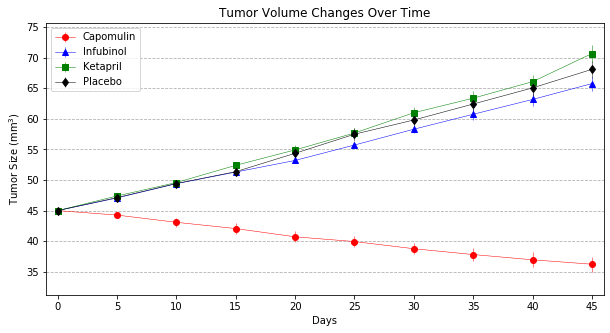

In [35]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,5))

# Get list of columns for setting up plots
cols = mean_tumor_pivot.columns.tolist()
# Make list of color and markers to use in plots.
colors = ['r','b','g','k']
markers = ['o','^','s','d']

# Create a plot with error bars for each drug we're interested in.  
# fmt="o" would only contain points, no lines, but lines were left in because it made sense for rates over time graphs
for x in range(len(cols)):
    plt.errorbar(x=tumor_std_err_pivot.index, y=mean_tumor_pivot[cols[x]], yerr=tumor_std_err_pivot[cols[x]], 
                 marker=markers[x], color=colors[x], label=cols[x], linewidth=.5)#,fmt="o")
    
# Include legend (labels were created with the plots) 
plt.legend(loc="upper left")
# Add title
plt.title("Tumor Volume Changes Over Time")
# Add x and y axis labels
plt.xlabel("Days")
plt.ylabel(r'Tumor Size (mm$^3$)')

# Set x axis limits and ticks
plt.xticks(np.arange(mean_tumor_pivot.index.min(),mean_tumor_pivot.index.max()+5,5))
plt.xlim(mean_tumor_pivot.index.min()-1,mean_tumor_pivot.index.max()+1)

# Set y limits
plt.ylim(mean_tumor_pivot.min().min()-5, mean_tumor_pivot.max().max()+5)

# Add grid lines for the y axis
plt.grid(axis='y', linestyle='--')

# Save the Figure
plt.savefig("Images/Tumor_Volume_Changes.png")

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = drugs_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_met_df = pd.DataFrame(mean_met)
# Preview DataFrame
mean_met_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_std_err = drugs_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
met_std_err_df = pd.DataFrame(met_std_err)

# Preview DataFrame
met_std_err_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_pivot = mean_met_df.pivot_table(index=["Timepoint"],columns=["Drug"],values="Metastatic Sites")
met_std_err_pivot = met_std_err_df.pivot_table(index=["Timepoint"],columns=["Drug"],values="Metastatic Sites")

# Preview that Reformatting worked
mean_met_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


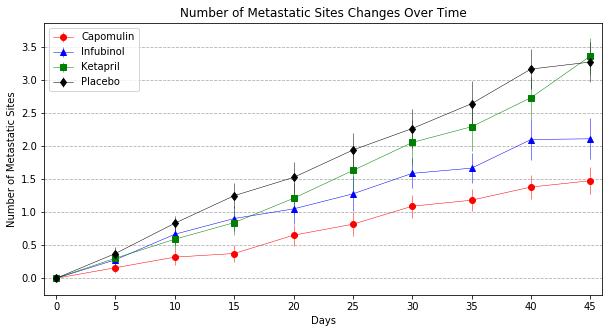

In [34]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,5))

# Get list of columns for setting up plots
cols = mean_met_pivot.columns.tolist()
# Make list of color and markers to use in plots.
colors = ['r','b','g','k']
markers = ['o','^','s','d']

# Create a plot with error bars for each drug we're interested in.  
# fmt="o" would only contain points, no lines, but lines were left in because it made sense for rates over time graphs
for x in range(len(cols)):
    #plt.scatter(x=mean_met_pivot.index, y=mean_met_pivot[cols[x]], color=colors[x], marker=markers[x], label=cols[x])
    plt.errorbar(x=met_std_err_pivot.index, y=mean_met_pivot[cols[x]], yerr=met_std_err_pivot[cols[x]], 
                 marker=markers[x], color=colors[x], label=cols[x], linewidth=.5 )#,fmt="o")
    
# Include legend (labels were created with the plots) 
plt.legend(loc="upper left")
# Add title
plt.title("Number of Metastatic Sites Changes Over Time")
# Add x and y axis labels
plt.xlabel("Days")
plt.ylabel("Number of Metastatic Sites")

# Set x axis limits and ticks
plt.xticks(np.arange(mean_met_pivot.index.min(),mean_met_pivot.index.max()+5,5))
plt.xlim(mean_met_pivot.index.min()-1,mean_met_pivot.index.max()+1)

# Set y limits
plt.ylim(mean_met_pivot.min().min()-.25, mean_met_pivot.max().max()+.5)

# Add grid lines for the y axis
plt.grid(axis='y', linestyle='--')

# Save the Figure
plt.savefig("Images/Metastatic_Sites_Changes.png")

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival = drugs_df.groupby(["Drug","Timepoint"])["Mouse ID"].count()
max_mice = survival.reset_index().groupby("Drug")["Mouse ID"].max()
#survival["Rates"] = survival["Mouse ID"]/max_mice

# Convert to DataFrame
survival_df = pd.DataFrame(survival).reset_index()
survival_df = survival_df.merge(pd.DataFrame(max_mice).rename(columns={"Mouse ID":"Count"}), on="Drug")
survival_df["Rates"] = survival_df["Mouse ID"]/survival_df["Count"]*100

# Preview DataFrame
survival_df.head()


,Drug,Timepoint,Mouse ID,Count,Rates
0,Capomulin,0,25,25,100.0
1,Capomulin,5,25,25,100.0
2,Capomulin,10,25,25,100.0
3,Capomulin,15,24,25,96.0
4,Capomulin,20,23,25,92.0


In [12]:
# Minor Data Munging to Re-Format the Data Frames
survival_pivot = survival_df.pivot_table(index=["Timepoint"],columns=["Drug"],values="Rates")

# Preview the Data Frame
survival_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0


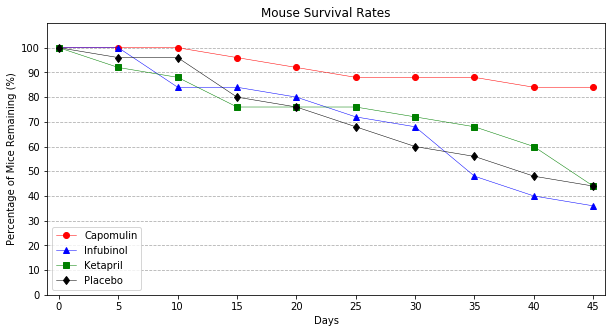

In [33]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(10,5))

# Get list of columns for setting up plots
cols = survival_pivot.columns.tolist()
# Make list of color and markers to use in plots.
colors = ['r','b','g','k']
markers = ['o','^','s','d']

# Create a plot for each drug we're interested in.  
for x in range(len(cols)):
    # Uncomment line below for a scatter plot. A line graph made more sense here, so I used that.
    # No Error bars, since that also does not make sense for this data.
#     plt.scatter(x=survival_pivot.index, y=survival_pivot[cols[x]], color=colors[x], marker=markers[x], label=cols[x], linewidth=.5)
    plt.plot(survival_pivot.index, survival_pivot[cols[x]], color=colors[x], marker=markers[x], label=cols[x], linewidth= 0.5)
    
# Include legend (labels were created with the plots) 
plt.legend(loc="lower left")

# Add title
plt.title("Mouse Survival Rates")

# Add x and y axis labels
plt.xlabel("Days")
plt.ylabel("Percentage of Mice Remaining (%)")

# Set x axis limits and ticks
plt.xticks(np.arange(survival_pivot.index.min(),survival_pivot.index.max()+5,5))
plt.xlim(survival_pivot.index.min()-1,survival_pivot.index.max()+1)

# Set y limits and ticks
plt.ylim(0,110)
plt.yticks(np.arange(0,110,10))

# Add grid lines for the y axis
plt.grid(axis='y', linestyle='--')

# Save the Figure
plt.savefig("Images/Survival_Rates.png")

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
percent_change = ((mean_tumor_pivot.iloc[-1,:] - mean_tumor_pivot.iloc[0,:])/mean_tumor_pivot.iloc[0,:]*100)
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

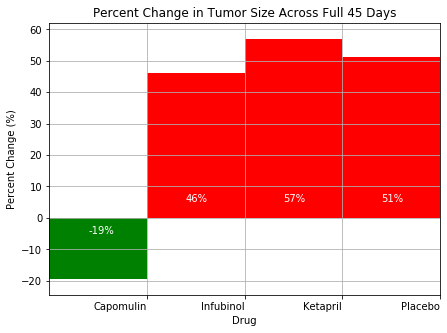

In [44]:
plt.figure(figsize=(7,5))

# Set list of colors based on greater than or less than 0
colors = ['g' if x < 0 else 'r' for x in percent_change]

# Plot bar graph using colors provided
percent_change.plot(kind="bar",color=colors, align="edge",width=1)

# Set x axis ticks and limits
plt.xticks(np.arange(1,len(percent_change)+1),percent_change.index.get_values(), rotation=0, horizontalalignment='right')
plt.xlim(0,len(percent_change))

# Set y axis limits
plt.ylim(percent_change.min()-5,percent_change.max()+5)

# Add Percentages on graph
for x in range(len(percent_change)):
    if percent_change[x] < 0:
        plt.text(x+.4,-5,"{:.0%}".format(percent_change[x]/100), color='w')
    else:
        plt.text(x+.4,5,"{:.0%}".format(percent_change[x]/100), color='w')

# Add grid
plt.grid()

# Include title
plt.title("Percent Change in Tumor Size Across Full 45 Days")
# Add x and y axis labels
plt.xlabel("Drug")
plt.ylabel("Percent Change (%)")

# Save figure
plt.savefig("Images/change.png")

## Observations
1. Capomulin showed decreases in tumor sizes over time.  This can also be seen in the percent change over the full 45 days.
2. Capomulin showed a higher rate of survival in mice.
3. Ketapril showed more tumor growth than the Placebo on the 45th day.  Prior to that, the Placebo shows more tumor growth.  Ketapril showed more Metastatic sites then the Placebo.  Ketapril had highest change in tumor sizes across the full 45 days. 